# Construção da base a partir do JSON

________
_______
_______

In [1]:
import numpy as np
import pandas as pd
import json
import re

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

import locale

locale.setlocale(locale.LC_ALL, '')

'LC_CTYPE=pt_BR.UTF-8;LC_NUMERIC=pt_BR.UTF-8;LC_TIME=pt_BR.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=pt_BR.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=pt_BR.UTF-8;LC_NAME=pt_BR.UTF-8;LC_ADDRESS=pt_BR.UTF-8;LC_TELEPHONE=pt_BR.UTF-8;LC_MEASUREMENT=pt_BR.UTF-8;LC_IDENTIFICATION=pt_BR.UTF-8'

In [2]:
# função de processamento de texto

from unicodedata import normalize

def tira_acento(x):
    
    return normalize('NFKD', x).encode('ASCII','ignore').decode('ASCII')

In [3]:
# função de exibição 

def show_all(df):
    
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_columns', None)
    
    display(df)
    
    pd.reset_option('display.max_colwidth')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_columns')
    

______

### 1) Leitura dos dados

In [4]:
from os import listdir
from os.path import isfile, join
import time

path = "../../../Scraper/dados/teste/"

print("\nLista de arquivos disponíveis para a leitura:\n")

file_list = [str(i) + " - " + f for i, f in enumerate(listdir(path)) if isfile(join(path, f))]

print(*file_list, sep="\n")

time.sleep(0.5)

num = int(input("\nDigite o número correspondente ao arquivo desejado: (0-" + str(len(file_list)-1) + "): "))

file_path = path + file_list[num].split(" - ")[-1]

file_path


Lista de arquivos disponíveis para a leitura:

0 - WEBMOTORS-16-05-2021-19h39.json

Digite o número correspondente ao arquivo desejado: (0-0): 0


'../../../Scraper/dados/teste/WEBMOTORS-16-05-2021-19h39.json'

In [5]:
# lê o arquivo e cria lista com json de cada carro

with open(file_path) as f:
    
    json_list = json.load(f)

In [6]:
# identificando quais chaves têm listas como valores
# nestes casos, o json_normaliza falha, por isso é importante identificarmos
# antes pra fazer o flatenning

list_values = []
for item in json_list:
    
    for key in item.keys():

        if type(item[key]) == list:

            # print(key, item[key])
            
            if key not in list_values:
                
                list_values.append(key)
                
if len(list_values) > 0:
    
    print("\nHá jsons com chaves cujos valores são listas!!")
    print("Estas chaves são:")
    print(list_values)
          
    print("\nVamos corrigir isso agora!")
    
    # fazendo o flattening dos valores que são listas

    for item in json_list:

        for key in list_values:

            try:
                for i in range(len(item[key])):

                    item[key + "_" + str(i+1)] = item[key][i]

                item.pop(key)

            except:

                pass
    
    print("\nTudo corrigido! Podemos seguir com a construção do df!")
    
# se não tiver nenhuma chave com essa característíca, ótimo!
else:
    
    print("\nNão há problemas com json algum, tudo certo!")
    print("\nPodemos seguir diretamente com a construlção do df!")


Não há problemas com json algum, tudo certo!

Podemos seguir diretamente com a construlção do df!


In [7]:
# montando o df

df = pd.json_normalize(json_list)

del json_list, list_values

In [8]:
df.shape

(1008, 41)

In [9]:
df.columns.tolist()

['long_comment',
 'fipe_percent',
 'price',
 'unico_dono',
 'ipva_pago',
 'aceita_troca',
 'combustivel',
 'motor',
 'cilindrada',
 'tracao',
 'valvulas',
 'cilindros_disp',
 'specification.title',
 'specification.make.value',
 'specification.model.value',
 'specification.version.value',
 'specification.year_fabrication',
 'specification.year_model',
 'specification.odometer',
 'specification.transmission',
 'specification.number_ports',
 'specification.body_type',
 'specification.armored',
 'specification.color.primary',
 'seller.seller_type',
 'seller.city',
 'seller.state',
 'seller.dealer_score',
 'seller.car_delivery',
 'seller.troca_com_troco',
 'seller.exceeded_plan',
 'financiado',
 'licenciado',
 'garantia_fabrica',
 'colecionador',
 'revisoes_concessionaria',
 'revisoes_agenda_carro',
 'good_deal',
 'pessoas_deficiencia',
 'alienado',
 'hot_deal.value1']

In [10]:
show_all(df.head(3))

,long_comment,fipe_percent,price,unico_dono,ipva_pago,aceita_troca,combustivel,motor,cilindrada,tracao,valvulas,cilindros_disp,specification.title,specification.make.value,specification.model.value,specification.version.value,specification.year_fabrication,specification.year_model,specification.odometer,specification.transmission,specification.number_ports,specification.body_type,specification.armored,specification.color.primary,seller.seller_type,seller.city,seller.state,seller.dealer_score,seller.car_delivery,seller.troca_com_troco,seller.exceeded_plan,financiado,licenciado,garantia_fabrica,colecionador,revisoes_concessionaria,revisoes_agenda_carro,good_deal,pessoas_deficiencia,alienado,hot_deal.value1
0,"Veículo Com Laudo Aprovado. Entrada de 3 Mill + Valor Financiado Descrito no Anúncio, Aprovamos Seu Crédito Sem Entrada ou Pequena Entrada e Parcelinhas Que Cabem no Seu Bolso. * Entrega do Veículo em Até 24 Horas Após Finalização da Compra*, Com Assinatura do Contrato em Domicílio. Mega Avaliação no Seu Usado!! *sujeito a Análise de Crédito Consulte Condições. *Nos reservamos para possíveis erros de digitação * Sujeito alteração de valor. *",114.00,58900.00,False,True,True,FLEX,FLEX,1.0,None,12V,None,HYUNDAI HB20 1.0 12V FLEX SENSE MANUAL,HYUNDAI,HB20,1.0 12V FLEX SENSE MANUAL,2021,2021.00,0.00,Manual,4,Hatchback,N,Vinho,PJ,São José dos Campos,São Paulo (SP),3,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Veículo com IPVA pago. Veículo exclusivo com visual esportivo, defletores aerodinâmicos no assoalho, piloto automático adaptativo, assistente de faixa, sistema de pré-colisão frontal com frenagem de emergência, controle de cruzeiro adaptativo, carregador de celular por indução, faróis LED com acendimento automático com sistema AHB, lanternas dianteiras com luzes diurnas DRLe faróis de neblina dianteiro de LED, acabamento interno em couro e ultrassuede, spoiler exclusivo Toyota gazzo. Outros Opcionais: Farol de neblina, Direção Elétrica, Comando de áudio no volante, Assistente de Partida em Rampa, Banco bi-partido, Controle de estabilidade, Distribuição eletrônica de frenagem, Kit Multimídia.",nan,164780.00,False,True,True,FLEX,FLEX,2.0,None,None,None,TOYOTA COROLLA 2.0 VVT-IE FLEX GR-S DIRECT SHIFT,TOYOTA,COROLLA,2.0 VVT-IE FLEX GR-S DIRECT SHIFT,2021,2022.00,100.00,CVT,4,Sedã,N,Branco,PJ,São Caetano do Sul,São Paulo (SP),0,True,True,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Na MF Motors você terá a melhor negociação do mercado. Oferecemos um valor competitivo no 0km, excelente avaliação na troca, além das melhores taxas de financiamento. Contando com uma experiência de mais de 15 anos de mercado, a MF Motors lhe proporcionará alta qualidade, transparência, segurança e confiança no negócio.\r\n\r\nFotos Ilustrativas\r\nA MF Motors se reserva no direito de corrigir possíveis erros de digitação e alteração nos anúncios sem aviso prévio Outros Opcionais: Farol de neblina, Comando de áudio no volante, Assistente de Partida em Rampa, Banco bi-partido, Controle de estabilidade, Distribuição eletrônica de frenagem, Kit Multimídia, MP3 Player, Pára-choques na cor do veículo.",nan,289990.00,False,False,True,DIESEL,TURBO,2.8,4X4,None,None,TOYOTA HILUX 2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2020,2021.00,0.00,Automática,4,Picape,N,Indefinida,PJ,São Paulo,São Paulo (SP),4,True,True,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   long_comment                    932 non-null    object 
 1   fipe_percent                    949 non-null    float64
 2   price                           1008 non-null   float64
 3   unico_dono                      999 non-null    object 
 4   ipva_pago                       998 non-null    object 
 5   aceita_troca                    975 non-null    object 
 6   combustivel                     1008 non-null   object 
 7   motor                           1008 non-null   object 
 8   cilindrada                      1006 non-null   object 
 9   tracao                          125 non-null    object 
 10  valvulas                        684 non-null    object 
 11  cilindros_disp                  84 non-null     object 
 12  specification.title             10

In [12]:
print("\nColunas com dados missing em respectiva proporção:")

# colunas com dados missing, apenas
# contagem já normalizada
missing = df.isnull().sum()[df.isnull().sum().apply(lambda x: True if x!=0 else False)]/df.shape[0]

# print formatado
missing.apply(lambda x: "{:.2f}%".format(x*100))


Colunas com dados missing em respectiva proporção:


long_comment                7.54%
fipe_percent                5.85%
unico_dono                  0.89%
ipva_pago                   0.99%
aceita_troca                3.27%
cilindrada                  0.20%
tracao                     87.60%
valvulas                   32.14%
cilindros_disp             91.67%
financiado                 30.85%
licenciado                 30.85%
garantia_fabrica           68.35%
colecionador               75.30%
revisoes_concessionaria    75.30%
revisoes_agenda_carro      83.83%
good_deal                  91.77%
pessoas_deficiencia        98.61%
alienado                   98.61%
hot_deal.value1            99.90%
dtype: object

_______

### 2) Pré-processamento

In [13]:
# caso queira evitar que alguma coluna seja dropada

keep = []

In [14]:
# vamos dropar as colunas que tenham mais que 50% de NaNs

threshold_drop = 0.5

print("\nColunas com proporção de NaNs maior que o threshold de {:.0f}%:\n".format(threshold_drop*100))

display(missing[missing>threshold_drop].apply(lambda x: "{:.2f}%".format(x*100)))

drop_nans = missing[missing>threshold_drop].index.tolist()

# evitando que colunas em "keep" sejam dropadas
drop_nans = [x for x in drop_nans if x not in keep]

# dropando!
df = df.drop(columns=drop_nans)

print("\nColunas acima dropadas com sucesso!")


Colunas com proporção de NaNs maior que o threshold de 50%:



tracao                     87.60%
cilindros_disp             91.67%
garantia_fabrica           68.35%
colecionador               75.30%
revisoes_concessionaria    75.30%
revisoes_agenda_carro      83.83%
good_deal                  91.77%
pessoas_deficiencia        98.61%
alienado                   98.61%
hot_deal.value1            99.90%
dtype: object


Colunas acima dropadas com sucesso!


In [15]:
# for item in df.columns.tolist():
    
#     print(f'"{item}" : "",')

In [16]:
# renomeando colunas

rename_dic = {  "long_comment" : "Comentário",
                "fipe_percent" : "(%) Tabela FIPE",
                "price" : "Preço",
                "unico_dono" : "Único Dono",
                "ipva_pago" : "IPVA Pago",
                "aceita_troca" : "Aceita Troca",
                "combustivel" : "Combustível",
                "motor" : "Motor",
                "cilindrada" : "Cilindrada",
                "valvulas" : "Válvulas",
                "specification.title" : "Título do Anúncio",
                "specification.make.value" : "Marca",
                "specification.model.value" : "Modelo",
                "specification.version.value" : "Versão",
                "specification.year_fabrication" : "Ano Fabricação",
                "specification.year_model" : "Ano Modelo",
                "specification.odometer" : "Km",
                "specification.transmission" : "Transmissão",
                "specification.number_ports" : "N° Portas",
                "specification.body_type" : "Categoria",
                "specification.armored" : "Blindado",
                "specification.color.primary" : "Cor",
                "seller.seller_type" : "Vendedor Tipo",
                "seller.city" : "Cidade",
                "seller.state" : "Estado",
                "seller.dealer_score" : "Dealer Score",
                "seller.car_delivery" : "Car Delivery",
                "seller.troca_com_troco" : "Troca Com Troco",
                "seller.exceeded_plan" : "Exceed Plan",
                "financiado" : "Financiado",
                "licenciado" : "Licenciado"}

df = df.rename(columns=rename_dic)

# determinando a ordem 
# tá comentado, achei desnecessário

cols_select = [ # atributos gerais
               'Título do Anúncio','Marca', 'Modelo', 
               'Versão', 'Ano Fabricação', 'Ano Modelo',
               'Km', 'Transmissão', 'N° Portas', 
               'Categoria', 'Blindado', 'Cor',
               'Combustível', 'Motor', 'Cilindrada', 'Válvulas',
                # preço
               'Preço', '(%) Tabela FIPE',
                # 'preco_busca', 
                # flags binarias
               'Único Dono', 'IPVA Pago', 'Aceita Troca', 'Financiado', 'Licenciado'
                # info vendedor
               'Vendedor Tipo', 'Cidade', 'Estado', 'Dealer Score',  
                # extras
               'Car Delivery', 'Troca Com Troco', 'Exceed Plan', 'Comentário',
                # 'exceeded_plan'
                ]

# pra garantir que tem apenas as colunas que existem (que nao foram dropadas antes)
cols_select = [item for item in cols_select if item in df.columns]

df = df[cols_select]

In [17]:
# basse com todas as infos acima, de cada carro

df.to_excel("relatorio_completo.xlsx")

In [18]:
show_all(df.head(3))

,Título do Anúncio,Marca,Modelo,Versão,Ano Fabricação,Ano Modelo,Km,Transmissão,N° Portas,Categoria,Blindado,Cor,Combustível,Motor,Cilindrada,Válvulas,Preço,(%) Tabela FIPE,Único Dono,IPVA Pago,Aceita Troca,Financiado,Cidade,Estado,Dealer Score,Car Delivery,Troca Com Troco,Exceed Plan,Comentário
0,HYUNDAI HB20 1.0 12V FLEX SENSE MANUAL,HYUNDAI,HB20,1.0 12V FLEX SENSE MANUAL,2021,2021.00,0.00,Manual,4,Hatchback,N,Vinho,FLEX,FLEX,1.0,12V,58900.00,114.00,False,True,True,NaN,São José dos Campos,São Paulo (SP),3,False,True,False,"Veículo Com Laudo Aprovado. Entrada de 3 Mill + Valor Financiado Descrito no Anúncio, Aprovamos Seu Crédito Sem Entrada ou Pequena Entrada e Parcelinhas Que Cabem no Seu Bolso. * Entrega do Veículo em Até 24 Horas Após Finalização da Compra*, Com Assinatura do Contrato em Domicílio. Mega Avaliação no Seu Usado!! *sujeito a Análise de Crédito Consulte Condições. *Nos reservamos para possíveis erros de digitação * Sujeito alteração de valor. *"
1,TOYOTA COROLLA 2.0 VVT-IE FLEX GR-S DIRECT SHIFT,TOYOTA,COROLLA,2.0 VVT-IE FLEX GR-S DIRECT SHIFT,2021,2022.00,100.00,CVT,4,Sedã,N,Branco,FLEX,FLEX,2.0,None,164780.00,nan,False,True,True,False,São Caetano do Sul,São Paulo (SP),0,True,True,False,"Veículo com IPVA pago. Veículo exclusivo com visual esportivo, defletores aerodinâmicos no assoalho, piloto automático adaptativo, assistente de faixa, sistema de pré-colisão frontal com frenagem de emergência, controle de cruzeiro adaptativo, carregador de celular por indução, faróis LED com acendimento automático com sistema AHB, lanternas dianteiras com luzes diurnas DRLe faróis de neblina dianteiro de LED, acabamento interno em couro e ultrassuede, spoiler exclusivo Toyota gazzo. Outros Opcionais: Farol de neblina, Direção Elétrica, Comando de áudio no volante, Assistente de Partida em Rampa, Banco bi-partido, Controle de estabilidade, Distribuição eletrônica de frenagem, Kit Multimídia."
2,TOYOTA HILUX 2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2020,2021.00,0.00,Automática,4,Picape,N,Indefinida,DIESEL,TURBO,2.8,None,289990.00,nan,False,False,True,False,São Paulo,São Paulo (SP),4,True,True,False,"Na MF Motors você terá a melhor negociação do mercado. Oferecemos um valor competitivo no 0km, excelente avaliação na troca, além das melhores taxas de financiamento. Contando com uma experiência de mais de 15 anos de mercado, a MF Motors lhe proporcionará alta qualidade, transparência, segurança e confiança no negócio.\r\n\r\nFotos Ilustrativas\r\nA MF Motors se reserva no direito de corrigir possíveis erros de digitação e alteração nos anúncios sem aviso prévio Outros Opcionais: Farol de neblina, Comando de áudio no volante, Assistente de Partida em Rampa, Banco bi-partido, Controle de estabilidade, Distribuição eletrônica de frenagem, Kit Multimídia, MP3 Player, Pára-choques na cor do veículo."


In [19]:
# isso vai auxiliar na correção dos dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Título do Anúncio  1008 non-null   object 
 1   Marca              1008 non-null   object 
 2   Modelo             1008 non-null   object 
 3   Versão             1008 non-null   object 
 4   Ano Fabricação     1008 non-null   object 
 5   Ano Modelo         1008 non-null   float64
 6   Km                 1008 non-null   float64
 7   Transmissão        1008 non-null   object 
 8   N° Portas          1008 non-null   object 
 9   Categoria          1008 non-null   object 
 10  Blindado           1008 non-null   object 
 11  Cor                1008 non-null   object 
 12  Combustível        1008 non-null   object 
 13  Motor              1008 non-null   object 
 14  Cilindrada         1006 non-null   object 
 15  Válvulas           684 non-null    object 
 16  Preço              1008 

In [20]:
# ajustando dtypes

df["Ano Fabricação"] = df["Ano Fabricação"].astype(int)

df["Ano Modelo"] = df["Ano Modelo"].astype(int)

df["N° Portas"] = df["N° Portas"].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Título do Anúncio  1008 non-null   object 
 1   Marca              1008 non-null   object 
 2   Modelo             1008 non-null   object 
 3   Versão             1008 non-null   object 
 4   Ano Fabricação     1008 non-null   int64  
 5   Ano Modelo         1008 non-null   int64  
 6   Km                 1008 non-null   float64
 7   Transmissão        1008 non-null   object 
 8   N° Portas          1008 non-null   int64  
 9   Categoria          1008 non-null   object 
 10  Blindado           1008 non-null   object 
 11  Cor                1008 non-null   object 
 12  Combustível        1008 non-null   object 
 13  Motor              1008 non-null   object 
 14  Cilindrada         1006 non-null   object 
 15  Válvulas           684 non-null    object 
 16  Preço              1008 

In [22]:
# avaliando stats descritivas procurando outliers absurdos

df.describe()

,Ano Fabricação,Ano Modelo,Km,N° Portas,Preço,(%) Tabela FIPE,Dealer Score
count,1008.00,1008.00,1008.00,1008.00,1008.00,949.00,1008.00
mean,2016.31,2016.91,55370.31,3.72,272093.28,224.19,0.75
std,5.72,5.78,46013.41,0.89,4849444.16,3575.97,1.33
min,1966.00,1966.00,0.00,0.00,10000.00,73.00,0.00
25%,2015.00,2015.00,28000.00,4.00,50990.00,101.00,0.00
50%,2018.00,2019.00,46305.50,4.00,74945.00,105.00,0.00
75%,2019.00,2020.00,71065.50,4.00,124900.00,110.00,1.00
max,2021.00,2022.00,365000.00,4.00,154000000.00,110266.00,4.00


In [23]:
aux = df[df["Preço"] > 1e8][["Marca", "Modelo", "Ano Fabricação", "Preço"]]

aux["Preço"] = aux["Preço"].apply(lambda x: locale.currency(x, grouping=True))

display(aux)

del aux

,Marca,Modelo,Ano Fabricação,Preço
446,VOLKSWAGEN,TIGUAN,2019,"R$ 154.000.000,00"


In [25]:
df.columns

Index(['Título do Anúncio', 'Marca', 'Modelo', 'Versão', 'Ano Fabricação',
       'Ano Modelo', 'Km', 'Transmissão', 'N° Portas', 'Categoria', 'Blindado',
       'Cor', 'Combustível', 'Motor', 'Cilindrada', 'Válvulas', 'Preço',
       '(%) Tabela FIPE', 'Único Dono', 'IPVA Pago', 'Aceita Troca',
       'Financiado', 'Cidade', 'Estado', 'Dealer Score', 'Car Delivery',
       'Troca Com Troco', 'Exceed Plan', 'Comentário'],
      dtype='object')

In [26]:
# separando dataframes pelo preço

df_mto_caro = df[df["Preço"] >= 1e6]

df_normal = df[df["Preço"] < 1e6]

# seguindo apenas com os carros que custam menos que 1 MM
df = df_normal.copy()

In [27]:
df_mto_caro.shape

(6, 29)

In [28]:
df_normal.shape

(1002, 29)

_______

### 4) Análise preliminar - marcas e modelos

In [30]:
# dic de dfs pra cada marca
# estrutura: {"marca" : df_com_marca_filtrada}

marcas = df["Marca"].unique().tolist()

df_marcas = {marca: df[df["Marca"] == marca] for marca in marcas}

In [31]:
# dic com a seguinte estrutura: {"marca": {"modelo_i" : df_modelo_i.describe()}}

# essa célula pode demorar um pouquinho...

modelos_describe = {marca : 
                           {modelo: df_marcas[marca].loc[df_marcas[marca]["Modelo"] == modelo].describe() 
                            for modelo in df_marcas[marca]["Modelo"].unique().tolist()}
                    for marca in marcas}

In [32]:
print("\nMarcas disponíveis:\n")

print(list(modelos_describe.keys()))


Marcas disponíveis:

['HYUNDAI', 'TOYOTA', 'BMW', 'VOLKSWAGEN', 'FIAT', 'AUDI', 'CHEVROLET', 'JEEP', 'FORD', 'HONDA', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ', 'PORSCHE', 'NISSAN', 'JAGUAR', 'RENAULT', 'EFFA', 'RAM', 'MITSUBISHI', 'DODGE', 'SUBARU', 'VOLVO', 'SUZUKI', 'KIA', 'PEUGEOT', 'CHERY', 'CITROËN', 'MINI', 'JINBEI', 'CHRYSLER', 'SSANGYONG', 'MASERATI', 'MERCURY', 'TROLLER', 'JAC', 'IVECO', 'ROLLS-ROYCE', 'MP LAFER', 'SMART']


In [33]:
# pegando modelos de determinada marca 

print(list(modelos_describe["HYUNDAI"].keys()))

['HB20', 'SANTA FÉ', 'CRETA', 'TUCSON', 'HB20S', 'IX35', 'AZERA', 'I30', 'GRAND SANTA FÉ', 'HB20X']


In [34]:
# pegando stats de determinado modelo

modelos_describe["HYUNDAI"]['HB20']

,Ano Fabricação,Ano Modelo,Km,N° Portas,Preço,(%) Tabela FIPE,Dealer Score
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,2017.22,2017.72,48498.67,4.00,48257.17,105.33,0.67
std,2.24,2.24,24779.07,0.00,7917.86,7.38,1.28
min,2012.00,2013.00,0.00,4.00,34900.00,87.00,0.00
25%,2016.00,2016.25,33889.00,4.00,44922.50,101.25,0.00
50%,2018.00,2018.50,52745.00,4.00,47945.00,104.50,0.00
75%,2018.75,2019.00,65212.50,4.00,52475.00,110.50,0.00
max,2021.00,2021.00,86000.00,4.00,66090.00,119.00,3.00


__Exportando as estatísticas descritivas por marca e modelo (sem demais agrupamentos)__

In [41]:
df_export_stats = pd.DataFrame()

for marca in modelos_describe.keys():
    
    for modelo in modelos_describe[marca].keys():

        aux = modelos_describe[marca][modelo].copy()
        
        aux.loc["count", "Ano"] = aux.loc["count"].dropna().max()
        aux.loc["count", aux.columns[1:]] = "-"
        
        aux = aux.reset_index(drop=False).rename(columns={"index":"stat"})

        aux["Marca"] = marca

        aux["Modelo"] = modelo

        aux = aux[["Marca", "Modelo"] + aux.columns.tolist()[:-2]]
        
        df_export_stats = pd.concat([df_export_stats, aux])
        
del aux

In [42]:
df_export_stats

,Marca,Modelo,stat,Ano Fabricação,Ano Modelo,Km,N° Portas,Preço,(%) Tabela FIPE,Dealer Score,Ano
0,HYUNDAI,HB20,count,18.00,-,-,-,-,-,-,-
1,HYUNDAI,HB20,mean,2017.22,2017.72,48498.67,4.00,48257.17,105.33,0.67,NaN
2,HYUNDAI,HB20,std,2.24,2.24,24779.07,0.00,7917.86,7.38,1.28,NaN
3,HYUNDAI,HB20,min,2012.00,2013.00,0.00,4.00,34900.00,87.00,0.00,NaN
4,HYUNDAI,HB20,25%,2016.00,2016.25,33889.00,4.00,44922.50,101.25,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3,SMART,FORTWO,min,2014.00,2014.00,83000.00,2.00,46000.00,106.00,0.00,NaN
4,SMART,FORTWO,25%,2014.00,2014.00,83000.00,2.00,46000.00,106.00,0.00,NaN
5,SMART,FORTWO,50%,2014.00,2014.00,83000.00,2.00,46000.00,106.00,0.00,NaN
6,SMART,FORTWO,75%,2014.00,2014.00,83000.00,2.00,46000.00,106.00,0.00,NaN


In [36]:
df_export_stats = df_export_stats.sort_values(["marca", "modelo"])

# formatando exibição de dados

df_export_stats["fipe_perc"] = df_export_stats["fipe_perc"].apply(lambda x: 
                                                                  "{:.1f}%".format(x) if str(x) not in ["nan", "-"] 
                                                                  else "-")

for col in ["ano", "ano_modelo", "num_portas"]:
    
    df_export_stats[col] = df_export_stats[col].apply(lambda x: 
                                                      int(x) if str(x) not in ["nan", "-"]
                                                      else "-")
    
df_export_stats["preco"] = df_export_stats["preco"].apply(lambda x: 
                                                          locale.currency(x, grouping=True) if str(x) not in ["nan", "-"] 
                                                          else "-")

df_export_stats["km"] = df_export_stats["km"].apply(lambda x: 
                                                    locale.format_string("%.2f", x, grouping=True) if str(x) not in ["nan", "-"] 
                                                    else "-")

df_export_stats["score_vendedor"] = df_export_stats["score_vendedor"].apply(lambda x: 
                                                                            round(x, 2) if str(x) not in ["nan", "-"] 
                                                                            else "-")

df_export_stats = df_export_stats.fillna("-")

# export
data_hora = file_path.split("/")[-1].split("WEBMOTORS-")[-1].split(".json")[0]

df_export_stats.to_excel("./outputs/stats_{}.xlsx".format(data_hora), index=False)

del df_export_stats

In [37]:
# groupby - {marca: {modelo_i :  groupby_i(ano, cilindrada, combustivel)}}
# esse tbm demora um pouco,,

# características que definem um carro ("RG do carro")
rg = "marca, modelo, ano_modelo, transmissao, categoria, blindado, num_portas, cilindrada, combustivel".split(", ")

marca_modelo_ano = {marca : 
                        {modelo: 
                                 df_marcas[marca][df_marcas[marca]["modelo"] == modelo].groupby(rg)[["km",
                                                                                                     "preco",
                                                                                                     "fipe_perc"]].agg(["count", 
                                                                                                                        "mean",
                                                                                                                        "min",
                                                                                                                        "max",
                                                                                                                        np.median,
                                                                                                                        np.std]) 
                        for modelo in df_marcas[marca]["modelo"].unique().tolist()}
                    for marca in marcas}

__Tabela final de groupbys - export__

In [75]:
df_export = pd.DataFrame()

for marca in marca_modelo_ano.keys():
    
    for modelo in marca_modelo_ano[marca].keys():
        
        df_export = pd.concat([df_export, marca_modelo_ano[marca][modelo]])

In [70]:
df_export_view = df_export.copy()

# fill nan
df_export_view = df_export_view.fillna("-")

# formatando dadosf
for col in df_export_view.columns:
    
    if col[0] == "preco":
    
        df_export_view.loc[:, 
                      col] = df_export_view.loc[:, 
                                            col].apply(lambda x: 
                                                       locale.currency(x, grouping=True) if type(x) == float
                                                       else (x if type(x) == int else "-"))
    else:
        
        df_export_view.loc[:, 
                      col] = df_export_view.loc[:, 
                                            col].apply(lambda x:
                                                       locale.format_string("%.2f", x, grouping=True) if type(x) == float
                                                       else (x if type(x) == int else "-"))


# flattening columns
df_export_view.columns = ['_'.join(col).strip() for col in df_export_view.columns.values]

# flatenning indexes
df_export_view = df_export_view.reset_index()
        
# ordenando
df_export_view = df_export_view.sort_values(["marca", "modelo", "preco_count"])

# export
data_hora = file_path.split("/")[-1].split("WEBMOTORS-")[-1].split(".json")[0]

df_export_view.to_excel("./outputs/report_{}.xlsx".format(data_hora), index=False)

del df_export_view

_______

# TO DO

pegar o dicionario acima, e pegar quais exemplares têm maior std de preço (ordenar).

- olhar tb os counts.

daí, rodar o dbscan abaixo rodado pra cada linha do grpupby acima (ou pegar dos 200 maiores std)

In [76]:
# flattening columns
df_export.columns = ['_'.join(col).strip() for col in df_export.columns.values]

# flatenning indexes
df_export = df_export.reset_index()

In [91]:
df_export = df_export.sort_values(["preco_std", "preco_count"], ascending=False)

# amostra minima
n_min = 30
df_export = df_export[df_export["preco_count"] > n_min]

# top N maiores std com amostra minima de 30 carros
std_N = 100
std_topN = df_export.head(std_N)

In [93]:
std_topN[rg]

,marca,modelo,ano_modelo,transmissao,categoria,blindado,num_portas,cilindrada,combustivel
955,BMW,X4,2020,Automática,Utilitário esportivo,N,4,3.0,GASOLINA
11115,FORD,FIESTA,2011,Manual,Hatchback,N,4,1.6,FLEX
4698,VOLKSWAGEN,T-CROSS,2021,Automática,Utilitário esportivo,N,4,1.0,FLEX
1444,MERCEDES-BENZ,GLC 250,2019,Automática,Utilitário esportivo,N,4,2.0,GASOLINA
6199,PORSCHE,911,2020,Automática,Cupê,N,2,3.0,GASOLINA
...,...,...,...,...,...,...,...,...,...
16129,MITSUBISHI,ECLIPSE CROSS,2020,Automática,Utilitário esportivo,N,4,1.5,GASOLINA
17044,TOYOTA,HILUX,2017,Automática,Picape,N,4,2.8,DIESEL
9106,CHEVROLET,CAMARO,2014,Automática,Cupê,N,2,6.2,GASOLINA
17983,CHERY,TIGGO 7,2020,Automática,Utilitário esportivo,N,4,1.5,FLEX


______

__Vamos pegar as linhas do df acima (segundo o RG de cada linha)__

Ou seja, vamos pegar os `std_N` exemplares de carros (com RG determinado) que têm maior std de preço - indicativo de maior amplitude da distribuição, mais provável de encontrarmos outliers

Destas, vamos rodar o DBSCAN pra cada modelo. Com isso, encontraremos outliers.

In [99]:
std_topN.iloc[0][rg].to_dict()

{'marca': 'BMW',
 'modelo': 'X4',
 'ano_modelo': 2020,
 'transmissao': 'Automática',
 'categoria': 'Utilitário esportivo',
 'blindado': 'N',
 'num_portas': 4,
 'cilindrada': '3.0',
 'combustivel': 'GASOLINA'}


#############################################################
#############################################################

RG:

marca : BMW
modelo : X4
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : GASOLINA


#############################################################
#############################################################



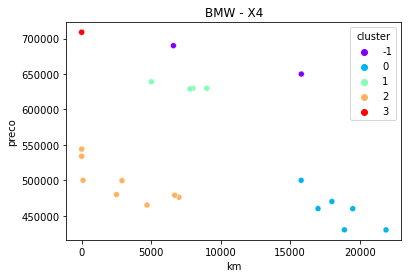


#############################################################
#############################################################

RG:

marca : FORD
modelo : FIESTA
ano_modelo : 2011
transmissao : Manual
categoria : Hatchback
blindado : N
num_portas : 4
cilindrada : 1.6
combustivel : FLEX


#############################################################
#############################################################



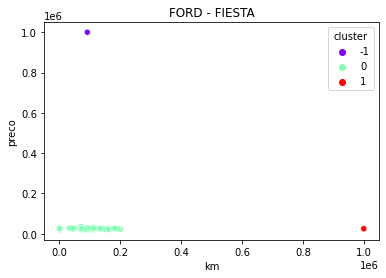


#############################################################
#############################################################

RG:

marca : VOLKSWAGEN
modelo : T-CROSS
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.0
combustivel : FLEX


#############################################################
#############################################################



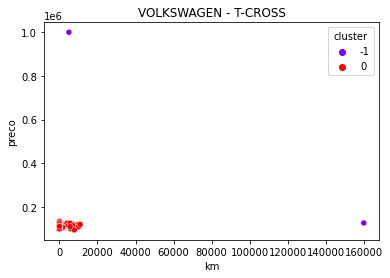


#############################################################
#############################################################

RG:

marca : MERCEDES-BENZ
modelo : GLC 250
ano_modelo : 2019
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



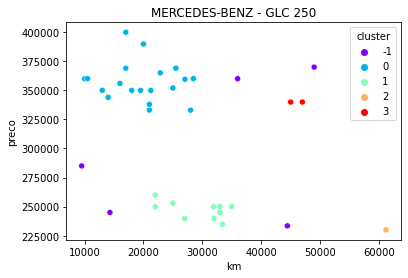


#############################################################
#############################################################

RG:

marca : PORSCHE
modelo : 911
ano_modelo : 2020
transmissao : Automática
categoria : Cupê
blindado : N
num_portas : 2
cilindrada : 3.0
combustivel : GASOLINA


#############################################################
#############################################################



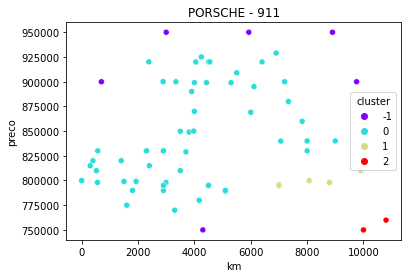


#############################################################
#############################################################

RG:

marca : MERCEDES-BENZ
modelo : GLC 250
ano_modelo : 2018
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



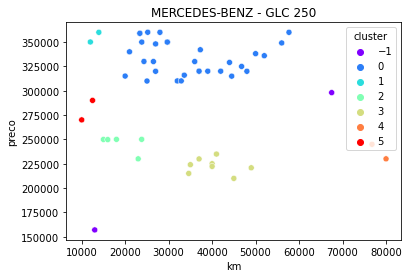


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : HILUX SW4
ano_modelo : 2019
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.7
combustivel : FLEX


#############################################################
#############################################################



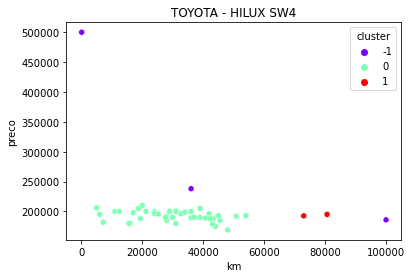


#############################################################
#############################################################

RG:

marca : MERCEDES-BENZ
modelo : GLC 250
ano_modelo : 2017
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



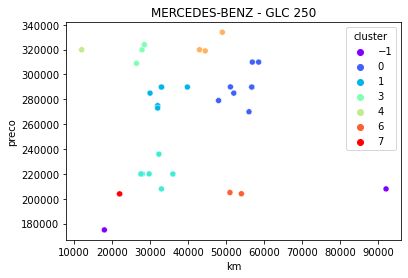


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DISCOVERY
ano_modelo : 2017
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



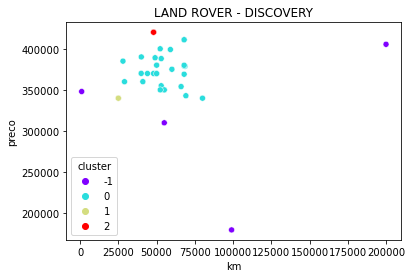


#############################################################
#############################################################

RG:

marca : PORSCHE
modelo : CAYENNE
ano_modelo : 2016
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.6
combustivel : GASOLINA


#############################################################
#############################################################



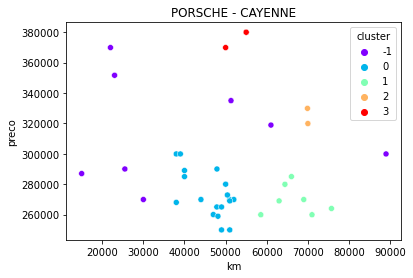


#############################################################
#############################################################

RG:

marca : VOLKSWAGEN
modelo : AMAROK
ano_modelo : 2018
transmissao : Manual
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : DIESEL


#############################################################
#############################################################



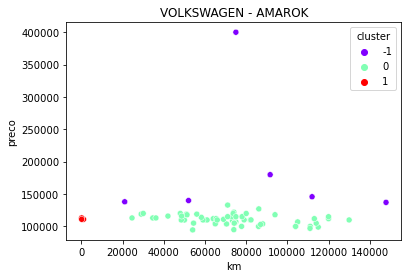


#############################################################
#############################################################

RG:

marca : AUDI
modelo : Q5
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : S
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



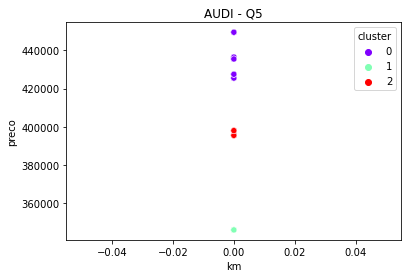


#############################################################
#############################################################

RG:

marca : MITSUBISHI
modelo : OUTLANDER SPORT
ano_modelo : 2022
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : FLEX


#############################################################
#############################################################



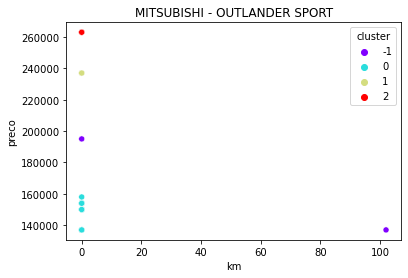


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER SPORT
ano_modelo : 2019
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



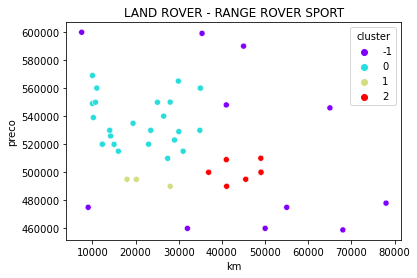


#############################################################
#############################################################

RG:

marca : VOLVO
modelo : XC90
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : HYBRID


#############################################################
#############################################################



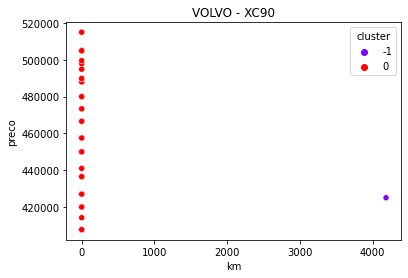


#############################################################
#############################################################

RG:

marca : AUDI
modelo : Q5
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



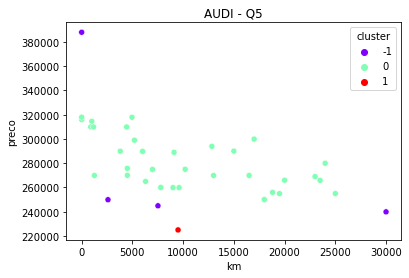


#############################################################
#############################################################

RG:

marca : KIA
modelo : SPORTAGE
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : S
num_portas : 4
cilindrada : 2.0
combustivel : FLEX


#############################################################
#############################################################



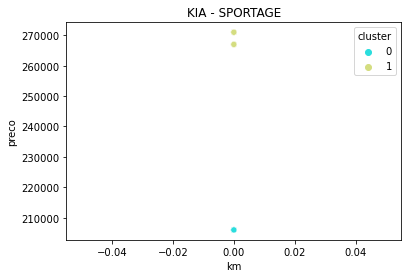


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : COROLLA
ano_modelo : 2021
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 1.8
combustivel : HYBRID


#############################################################
#############################################################



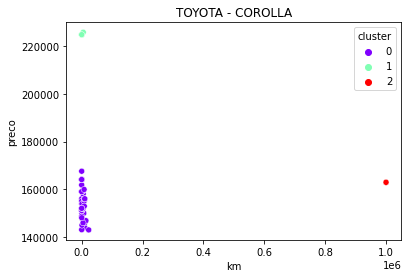


#############################################################
#############################################################

RG:

marca : MERCEDES-BENZ
modelo : GLE 400d
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



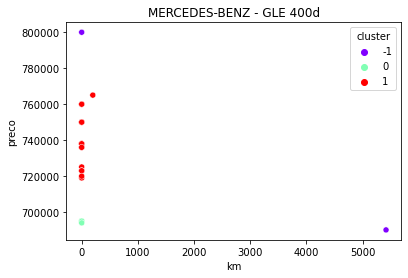


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DEFENDER
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



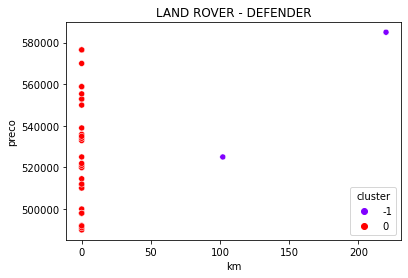


#############################################################
#############################################################

RG:

marca : PORSCHE
modelo : MACAN
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



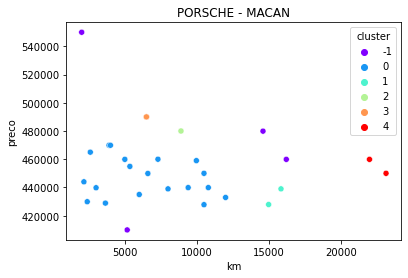


#############################################################
#############################################################

RG:

marca : VOLKSWAGEN
modelo : KOMBI
ano_modelo : 2014
transmissao : Manual
categoria : Van/Utilitário
blindado : N
num_portas : 4
cilindrada : 1.4
combustivel : FLEX


#############################################################
#############################################################



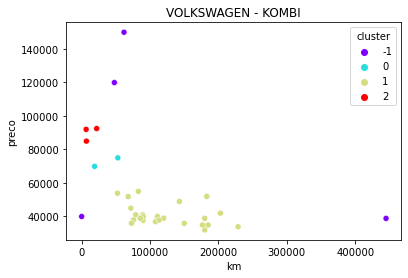


#############################################################
#############################################################

RG:

marca : MITSUBISHI
modelo : L200 TRITON
ano_modelo : 2022
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.4
combustivel : DIESEL


#############################################################
#############################################################



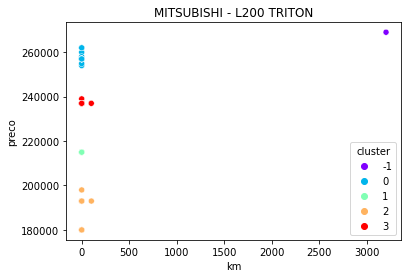


#############################################################
#############################################################

RG:

marca : MERCEDES-BENZ
modelo : GLC 220d
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : DIESEL


#############################################################
#############################################################



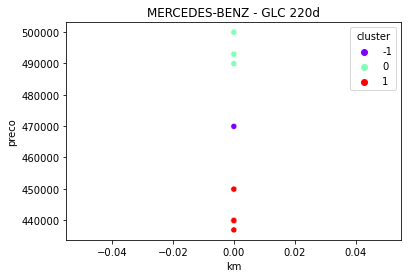


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER VELAR
ano_modelo : 2018
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : GASOLINA


#############################################################
#############################################################



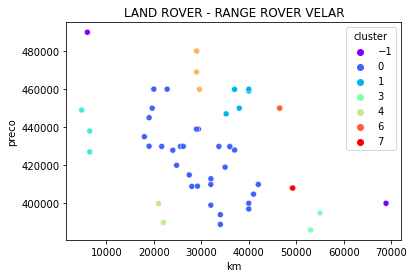


#############################################################
#############################################################

RG:

marca : AUDI
modelo : A4
ano_modelo : 2021
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



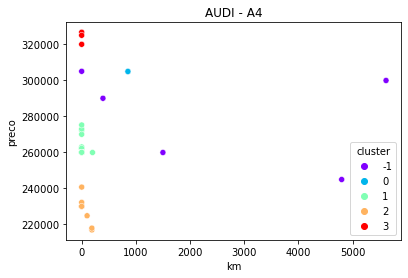


#############################################################
#############################################################

RG:

marca : MITSUBISHI
modelo : L200 TRITON
ano_modelo : 2021
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.4
combustivel : DIESEL


#############################################################
#############################################################



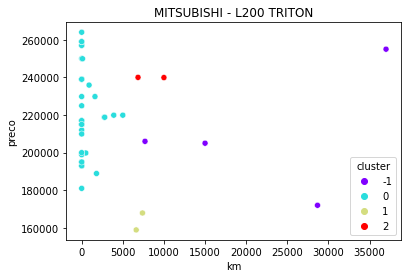


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER SPORT
ano_modelo : 2016
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



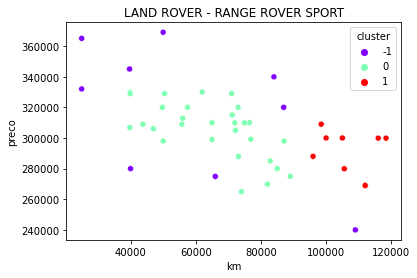


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER EVOQUE
ano_modelo : 2018
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



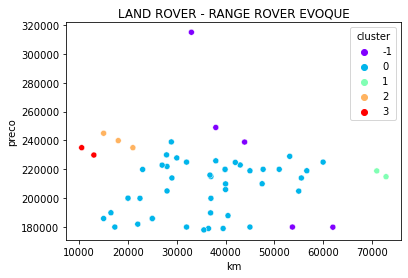


#############################################################
#############################################################

RG:

marca : AUDI
modelo : A5
ano_modelo : 2019
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



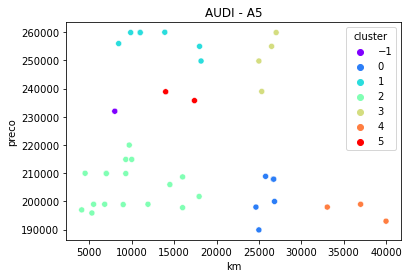


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : HILUX
ano_modelo : 2021
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.8
combustivel : DIESEL


#############################################################
#############################################################



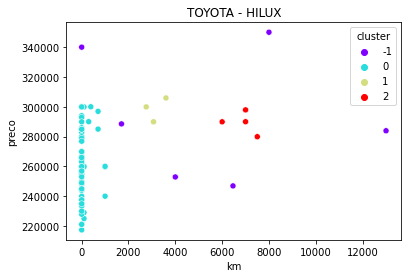


#############################################################
#############################################################

RG:

marca : PORSCHE
modelo : 718
ano_modelo : 2020
transmissao : Automática
categoria : Conversível
blindado : N
num_portas : 2
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



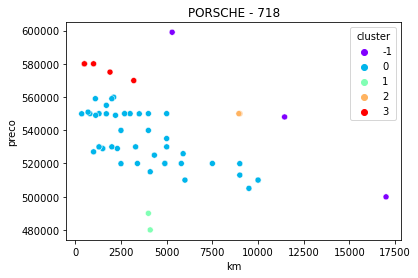


#############################################################
#############################################################

RG:

marca : RENAULT
modelo : MASTER
ano_modelo : 2014
transmissao : Manual
categoria : Van/Utilitário
blindado : N
num_portas : 4
cilindrada : 2.3
combustivel : DIESEL


#############################################################
#############################################################



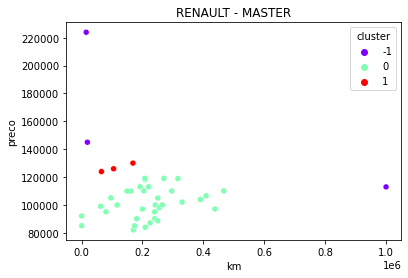


#############################################################
#############################################################

RG:

marca : VOLVO
modelo : XC40
ano_modelo : 2019
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



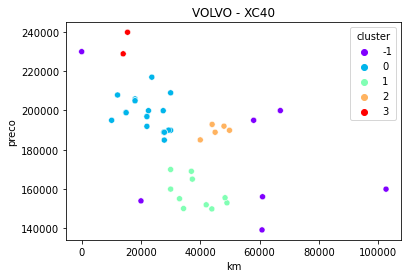


#############################################################
#############################################################

RG:

marca : FORD
modelo : EDGE
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.7
combustivel : GASOLINA


#############################################################
#############################################################



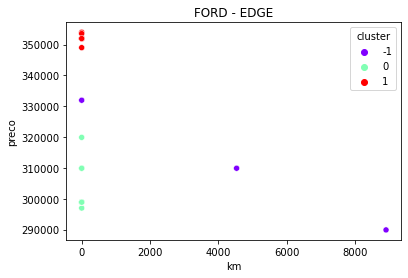


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : HILUX
ano_modelo : 2019
transmissao : Manual
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.8
combustivel : DIESEL


#############################################################
#############################################################



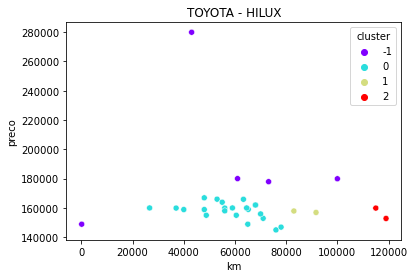


#############################################################
#############################################################

RG:

marca : VOLVO
modelo : S60
ano_modelo : 2021
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : HIBRIDO


#############################################################
#############################################################



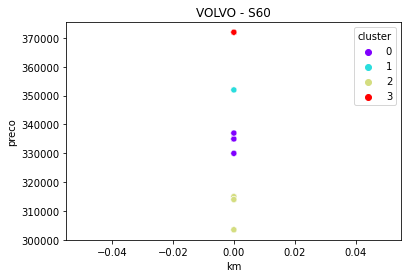


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DISCOVERY 4
ano_modelo : 2015
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



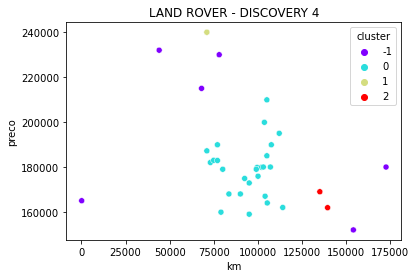


#############################################################
#############################################################

RG:

marca : VOLVO
modelo : XC60
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : HYBRID


#############################################################
#############################################################



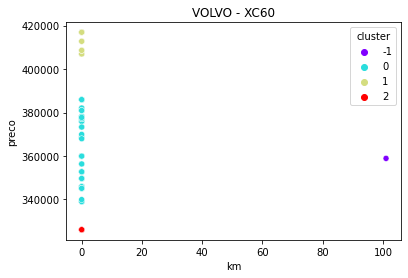


#############################################################
#############################################################

RG:

marca : FIAT
modelo : DUCATO
ano_modelo : 2021
transmissao : Manual
categoria : Van/Utilitário
blindado : N
num_portas : 4
cilindrada : 2.3
combustivel : DIESEL


#############################################################
#############################################################



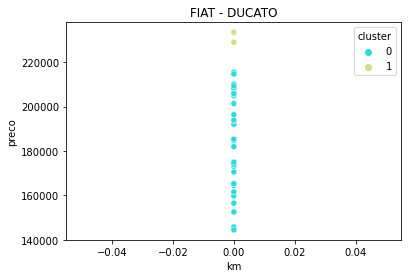


#############################################################
#############################################################

RG:

marca : AUDI
modelo : Q3
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.4
combustivel : GASOLINA


#############################################################
#############################################################



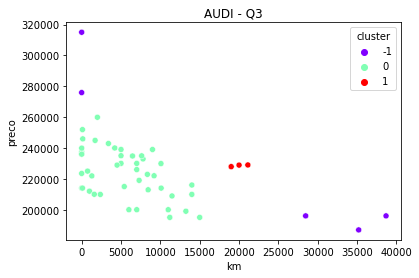


#############################################################
#############################################################

RG:

marca : VOLKSWAGEN
modelo : FUSCA
ano_modelo : 1995
transmissao : Manual
categoria : Sedã
blindado : N
num_portas : 2
cilindrada : 1.6
combustivel : GASOLINA


#############################################################
#############################################################



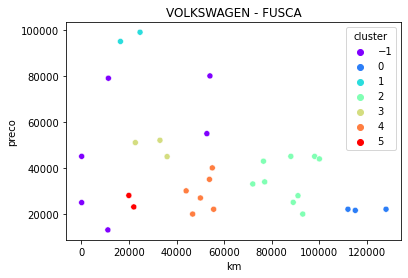


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER SPORT
ano_modelo : 2015
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



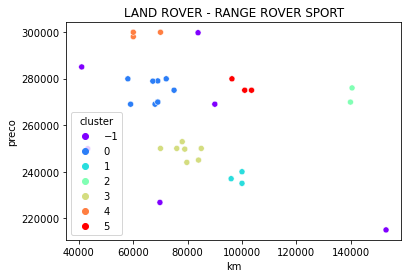


#############################################################
#############################################################

RG:

marca : KIA
modelo : SPORTAGE
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : FLEX


#############################################################
#############################################################



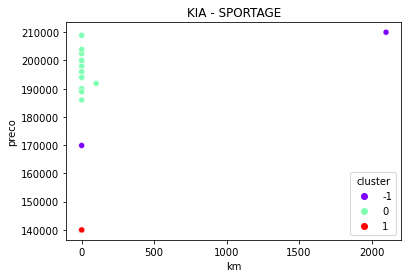


#############################################################
#############################################################

RG:

marca : BMW
modelo : 330i
ano_modelo : 2020
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



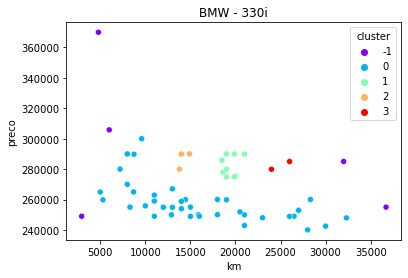


#############################################################
#############################################################

RG:

marca : KIA
modelo : SPORTAGE
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : FLEX


#############################################################
#############################################################



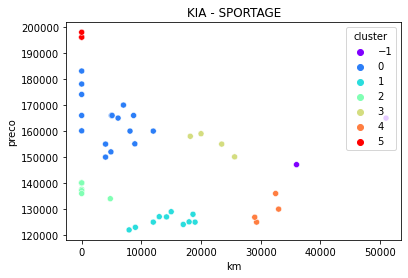


#############################################################
#############################################################

RG:

marca : BMW
modelo : X1
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : FLEX


#############################################################
#############################################################



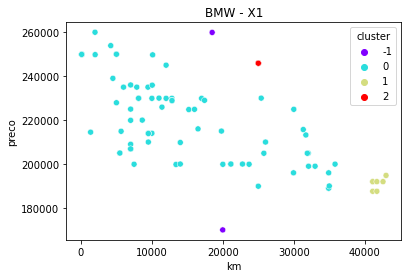


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : HILUX
ano_modelo : 2020
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.8
combustivel : DIESEL


#############################################################
#############################################################



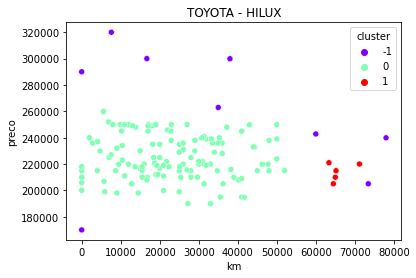


#############################################################
#############################################################

RG:

marca : HYUNDAI
modelo : TUCSON
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.6
combustivel : GASOLINA


#############################################################
#############################################################



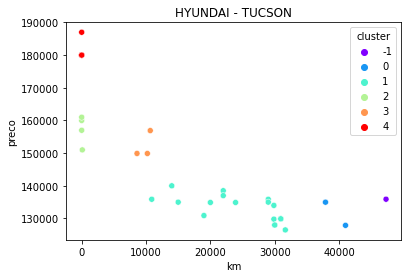


#############################################################
#############################################################

RG:

marca : RENAULT
modelo : MASTER
ano_modelo : 2021
transmissao : Manual
categoria : Van/Utilitário
blindado : N
num_portas : 3
cilindrada : 2.3
combustivel : DIESEL


#############################################################
#############################################################



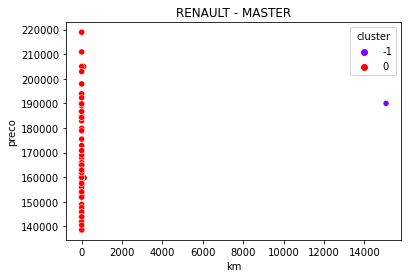


#############################################################
#############################################################

RG:

marca : JEEP
modelo : COMPASS
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : S
num_portas : 4
cilindrada : 2.0
combustivel : DIESEL


#############################################################
#############################################################



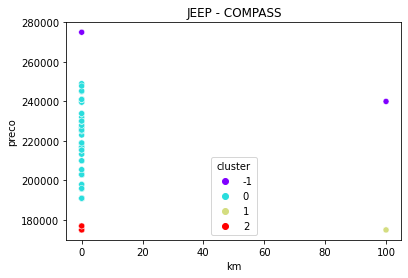


#############################################################
#############################################################

RG:

marca : AUDI
modelo : A4
ano_modelo : 2018
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



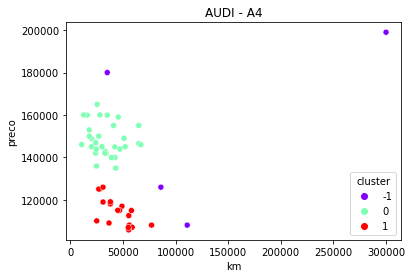


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DISCOVERY 4
ano_modelo : 2011
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



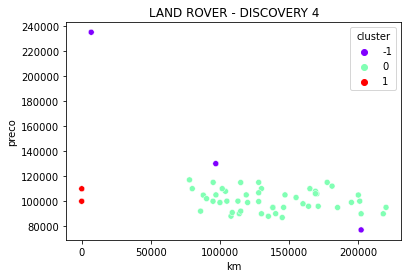


#############################################################
#############################################################

RG:

marca : VOLVO
modelo : XC40
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.5
combustivel : OUTRO


#############################################################
#############################################################



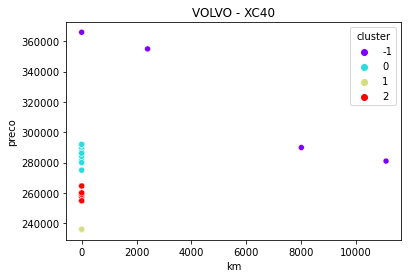


#############################################################
#############################################################

RG:

marca : VOLVO
modelo : XC40
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : S
num_portas : 4
cilindrada : 1.5
combustivel : OUTRO


#############################################################
#############################################################



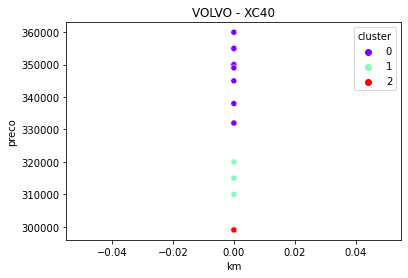


#############################################################
#############################################################

RG:

marca : VOLVO
modelo : XC60
ano_modelo : 2018
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



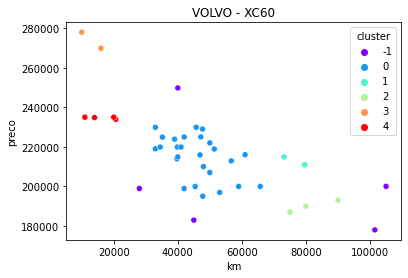


#############################################################
#############################################################

RG:

marca : BMW
modelo : X6
ano_modelo : 2014
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : GASOLINA


#############################################################
#############################################################



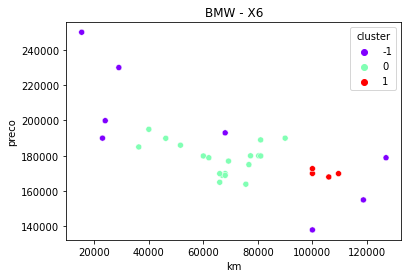


#############################################################
#############################################################

RG:

marca : DODGE
modelo : RAM
ano_modelo : 2020
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 6.7
combustivel : DIESEL


#############################################################
#############################################################



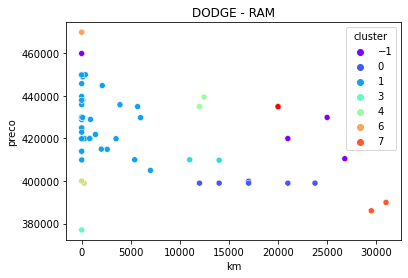


#############################################################
#############################################################

RG:

marca : MERCEDES-BENZ
modelo : SPRINTER
ano_modelo : 2019
transmissao : Manual
categoria : Van/Utilitário
blindado : N
num_portas : 3
cilindrada : 2.2
combustivel : DIESEL


#############################################################
#############################################################



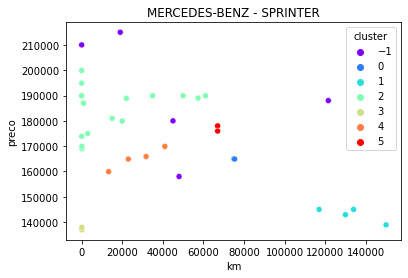


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER SPORT
ano_modelo : 2017
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



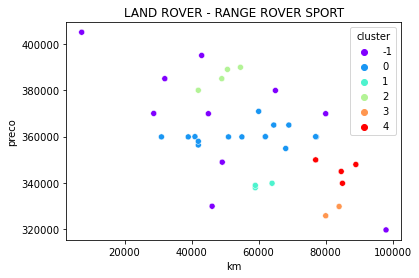


#############################################################
#############################################################

RG:

marca : AUDI
modelo : Q3
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : S
num_portas : 4
cilindrada : 1.4
combustivel : GASOLINA


#############################################################
#############################################################



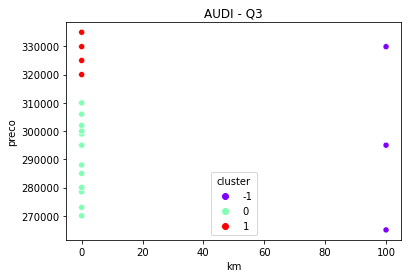


#############################################################
#############################################################

RG:

marca : MERCEDES-BENZ
modelo : SPRINTER
ano_modelo : 2014
transmissao : Manual
categoria : Van/Utilitário
blindado : N
num_portas : 3
cilindrada : 2.2
combustivel : DIESEL


#############################################################
#############################################################



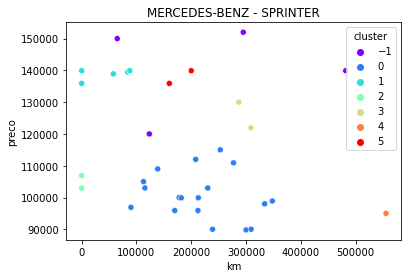


#############################################################
#############################################################

RG:

marca : PEUGEOT
modelo : 3008
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.6
combustivel : GASOLINA


#############################################################
#############################################################



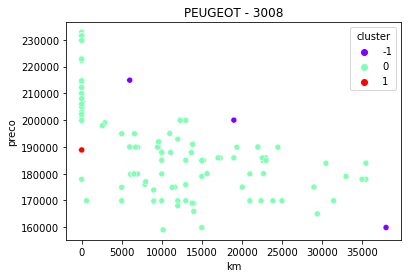


#############################################################
#############################################################

RG:

marca : BMW
modelo : M 340i
ano_modelo : 2021
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : GASOLINA


#############################################################
#############################################################



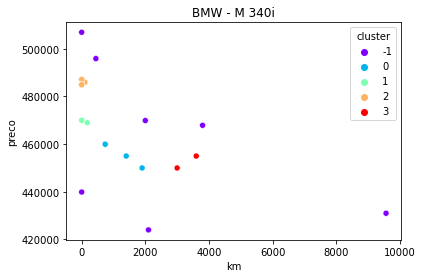


#############################################################
#############################################################

RG:

marca : VOLKSWAGEN
modelo : AMAROK
ano_modelo : 2018
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : DIESEL


#############################################################
#############################################################



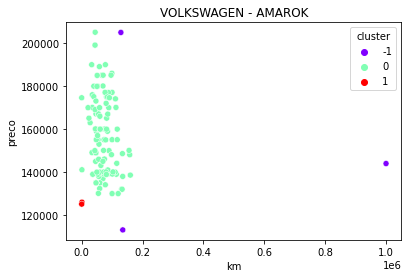


#############################################################
#############################################################

RG:

marca : JEEP
modelo : COMPASS
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : DIESEL


#############################################################
#############################################################



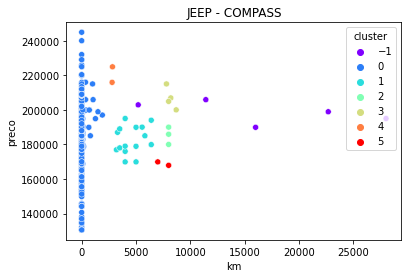


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DISCOVERY 4
ano_modelo : 2014
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



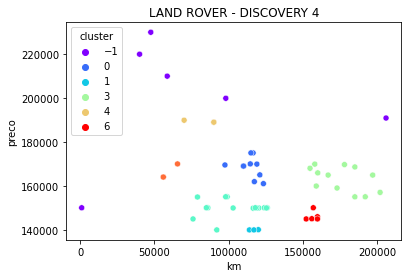


#############################################################
#############################################################

RG:

marca : FORD
modelo : RANGER
ano_modelo : 2021
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 3.2
combustivel : DIESEL


#############################################################
#############################################################



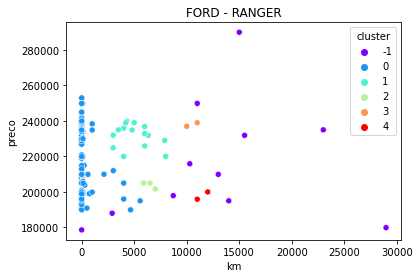


#############################################################
#############################################################

RG:

marca : RENAULT
modelo : MASTER
ano_modelo : 2015
transmissao : Manual
categoria : Van/Utilitário
blindado : N
num_portas : 4
cilindrada : 2.3
combustivel : DIESEL


#############################################################
#############################################################



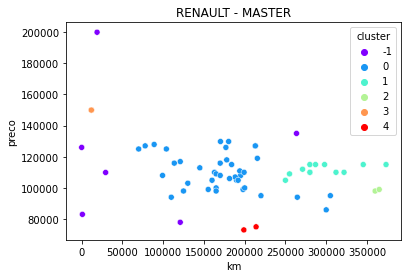


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DISCOVERY SPORT
ano_modelo : 2018
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



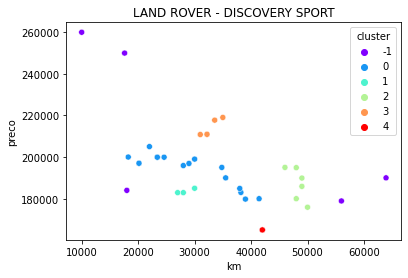


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER VELAR
ano_modelo : 2019
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



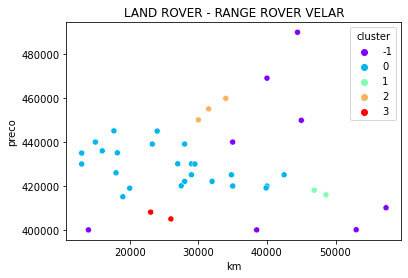


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER EVOQUE
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



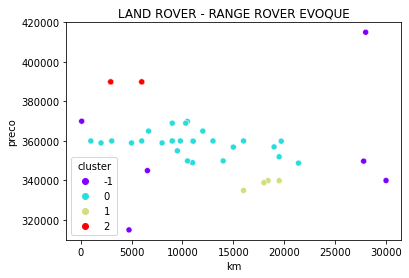


#############################################################
#############################################################

RG:

marca : AUDI
modelo : A5
ano_modelo : 2018
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



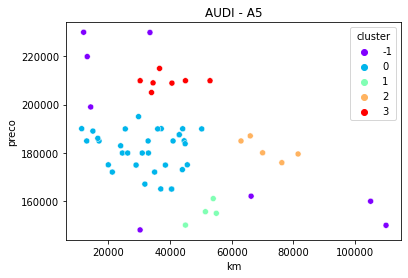


#############################################################
#############################################################

RG:

marca : BMW
modelo : 320i
ano_modelo : 2021
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



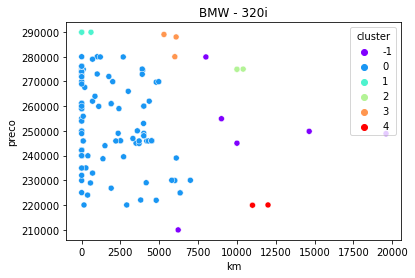


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DISCOVERY 4
ano_modelo : 2016
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.0
combustivel : DIESEL


#############################################################
#############################################################



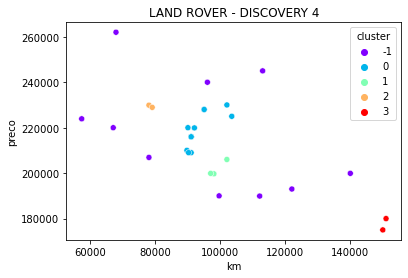


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : HILUX
ano_modelo : 2021
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.7
combustivel : FLEX


#############################################################
#############################################################



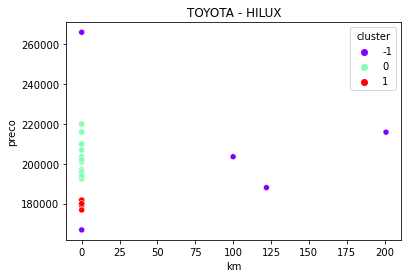


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DISCOVERY SPORT
ano_modelo : 2019
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : DIESEL


#############################################################
#############################################################



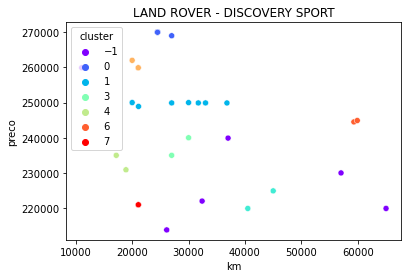


#############################################################
#############################################################

RG:

marca : NISSAN
modelo : FRONTIER
ano_modelo : 2021
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.3
combustivel : DIESEL


#############################################################
#############################################################



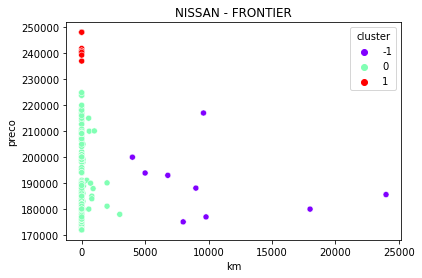


#############################################################
#############################################################

RG:

marca : BMW
modelo : 320i
ano_modelo : 2021
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : FLEX


#############################################################
#############################################################



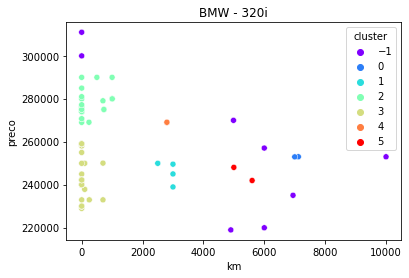


#############################################################
#############################################################

RG:

marca : FORD
modelo : MUSTANG
ano_modelo : 2020
transmissao : Automática
categoria : Cupê
blindado : N
num_portas : 2
cilindrada : 5.0
combustivel : GASOLINA


#############################################################
#############################################################



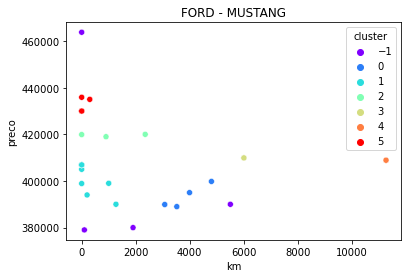


#############################################################
#############################################################

RG:

marca : MINI
modelo : COOPER
ano_modelo : 2020
transmissao : Automática
categoria : Hatchback
blindado : N
num_portas : 2
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



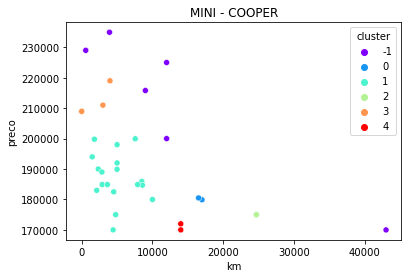


#############################################################
#############################################################

RG:

marca : MITSUBISHI
modelo : PAJERO FULL
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 3.2
combustivel : DIESEL


#############################################################
#############################################################



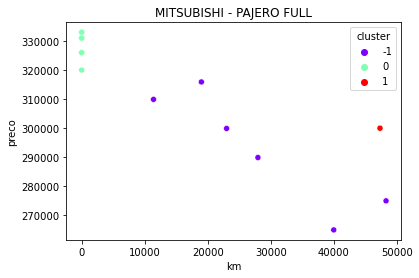


#############################################################
#############################################################

RG:

marca : MITSUBISHI
modelo : PAJERO SPORT
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.4
combustivel : DIESEL


#############################################################
#############################################################



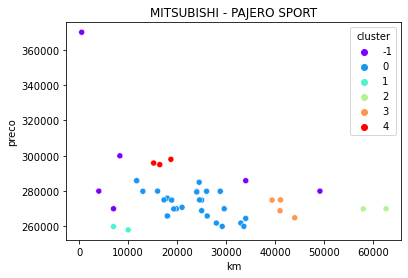


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : HILUX SW4
ano_modelo : 2021
transmissao : Automática
categoria : Picape
blindado : S
num_portas : 4
cilindrada : 2.8
combustivel : DIESEL


#############################################################
#############################################################



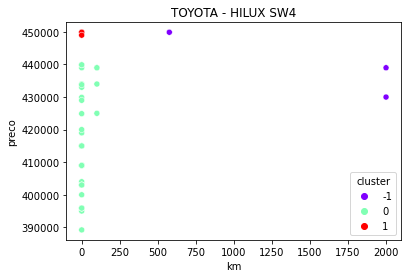


#############################################################
#############################################################

RG:

marca : VOLVO
modelo : XC60
ano_modelo : 2019
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



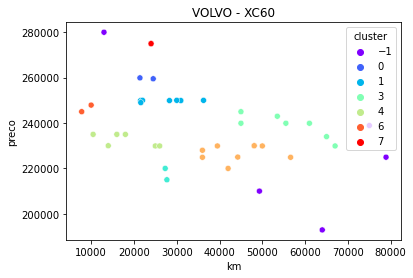


#############################################################
#############################################################

RG:

marca : NISSAN
modelo : FRONTIER
ano_modelo : 2020
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.3
combustivel : DIESEL


#############################################################
#############################################################



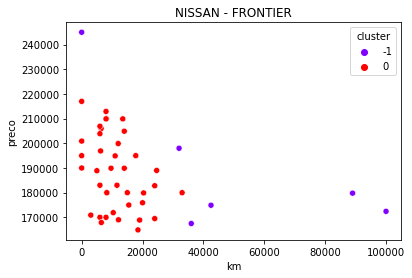


#############################################################
#############################################################

RG:

marca : MITSUBISHI
modelo : ECLIPSE CROSS
ano_modelo : 2022
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.5
combustivel : GASOLINA


#############################################################
#############################################################



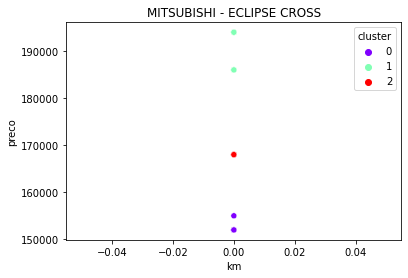


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER EVOQUE
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : FLEX


#############################################################
#############################################################



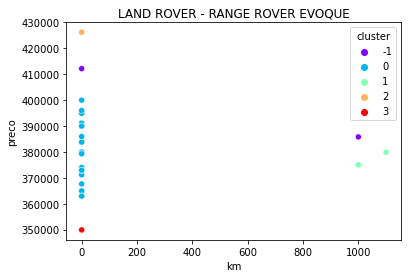


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : HILUX
ano_modelo : 2019
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.7
combustivel : FLEX


#############################################################
#############################################################



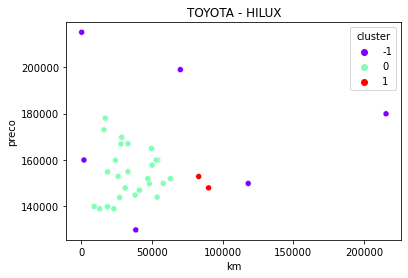


#############################################################
#############################################################

RG:

marca : AUDI
modelo : Q3
ano_modelo : 2021
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.4
combustivel : GASOLINA


#############################################################
#############################################################



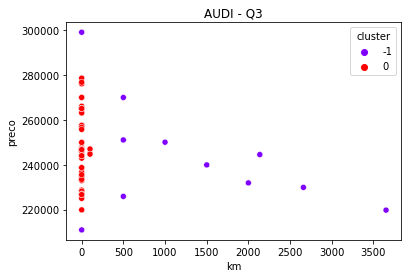


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : RANGE ROVER EVOQUE
ano_modelo : 2016
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



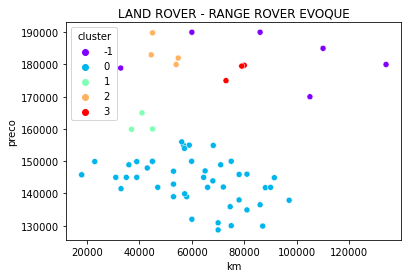


#############################################################
#############################################################

RG:

marca : BMW
modelo : 320i
ano_modelo : 2020
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



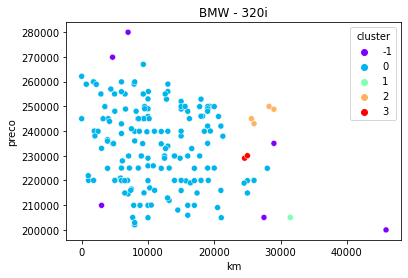


#############################################################
#############################################################

RG:

marca : LAND ROVER
modelo : DISCOVERY SPORT
ano_modelo : 2018
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : DIESEL


#############################################################
#############################################################



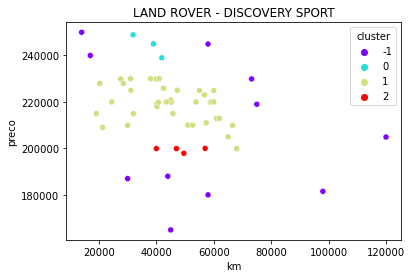


#############################################################
#############################################################

RG:

marca : MITSUBISHI
modelo : LANCER
ano_modelo : 2014
transmissao : Automática
categoria : Sedã
blindado : N
num_portas : 4
cilindrada : 2.0
combustivel : GASOLINA


#############################################################
#############################################################



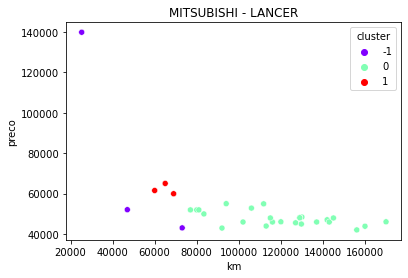


#############################################################
#############################################################

RG:

marca : FORD
modelo : MUSTANG
ano_modelo : 2018
transmissao : Automática
categoria : Cupê
blindado : N
num_portas : 2
cilindrada : 5.0
combustivel : GASOLINA


#############################################################
#############################################################



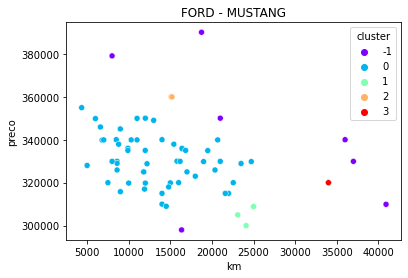


#############################################################
#############################################################

RG:

marca : MITSUBISHI
modelo : ECLIPSE CROSS
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.5
combustivel : GASOLINA


#############################################################
#############################################################



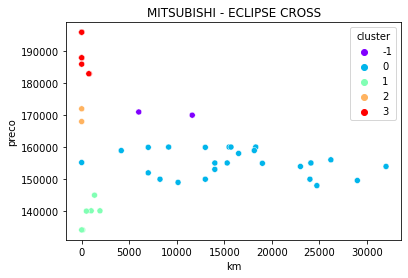


#############################################################
#############################################################

RG:

marca : TOYOTA
modelo : HILUX
ano_modelo : 2017
transmissao : Automática
categoria : Picape
blindado : N
num_portas : 4
cilindrada : 2.8
combustivel : DIESEL


#############################################################
#############################################################



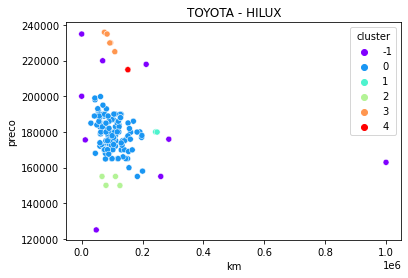


#############################################################
#############################################################

RG:

marca : CHEVROLET
modelo : CAMARO
ano_modelo : 2014
transmissao : Automática
categoria : Cupê
blindado : N
num_portas : 2
cilindrada : 6.2
combustivel : GASOLINA


#############################################################
#############################################################



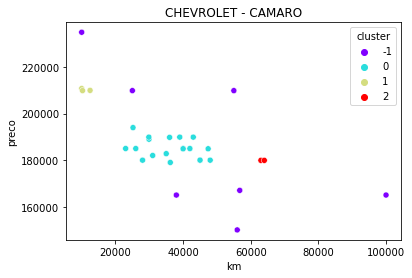


#############################################################
#############################################################

RG:

marca : CHERY
modelo : TIGGO 7
ano_modelo : 2020
transmissao : Automática
categoria : Utilitário esportivo
blindado : N
num_portas : 4
cilindrada : 1.5
combustivel : FLEX


#############################################################
#############################################################



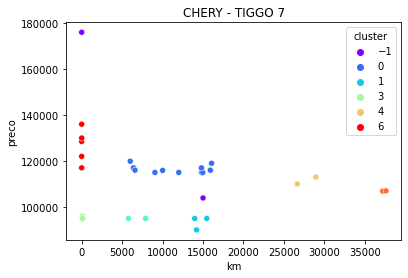


#############################################################
#############################################################

RG:

marca : FIAT
modelo : PALIO
ano_modelo : 2015
transmissao : Manual
categoria : Hatchback
blindado : N
num_portas : 4
cilindrada : 1.0
combustivel : FLEX


#############################################################
#############################################################



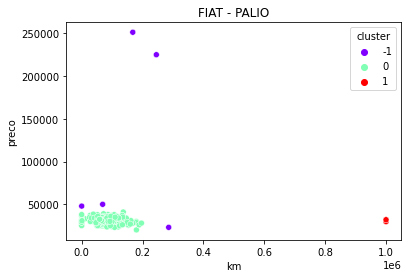

In [127]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
topN_dict = {}

for i in range(std_topN.shape[0]):
    
    rg_data = std_topN.iloc[i][rg].to_dict()
    
    marca = rg_data["marca"]
    modelo = rg_data["modelo"]
    
    print("\n#############################################################")
    print("#############################################################")
    print("\nRG:\n")
    for key, value in rg_data.items():
        print(key, ":", value)
    print("\n")
    print("#############################################################")
    print("#############################################################\n")
    
    aux = std_topN.iloc[[i]][rg].merge(df, on=rg, how="inner").copy()
    
    #################################################################################
#     # visualizando preço vs km com hue de ano
#     f = sns.scatterplot(data=aux, y="preco", x="km", 
#                         hue="ano", palette="rainbow")

#     ax = plt.gca()
#     ax.set_title(marca + " - " + modelo)

#     plt.show()
    #################################################################################

    # clustering

    # selecionando features - apenas numeric & bool
    X = aux.select_dtypes(include=[np.number, np.bool]).copy()

    # selecionando apenas algumas cols - sempre inclua preco!
    cols_features = ["preco", "km"]
    X = aux[cols_features]

    # preenchendo NaNs
    cols_with_nan = X.isnull().any(axis=0)[X.isnull().any(axis=0) == True].index

    for col in cols_with_nan:

        # definindo os atributos pro cruzamento
        cols = ['transmissao', 'categoria', 'blindado', 'cilindrada', 'combustivel']

        # fazendo o agrupamento
        media_col = aux.groupby(cols)[[col]].mean().reset_index()

        # sub-base com valores missing de "col", e apenas as colunas de cruzamento
        X_col_missing = aux.loc[X[col].isnull()][cols]

        # fazendo o cruzamento
        valores_a_preencher = X_col_missing.merge(media_col, 
                                                  on=cols, 
                                                  how="left").set_index(X_col_missing.index)[col]

        # preenchendo vazio com as médias
        X.loc[df[col].isnull(), col] = valores_a_preencher

    # normalização
    X = pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns, index= X.index)

    #################################################################################
#     # visualizando a normalização
#     f = sns.scatterplot(data=X, y="preco", x="km", palette="rainbow")

#     ax = plt.gca()
#     ax.set_title(marca + " - " + modelo)

#     plt.show()
    #################################################################################

    # modelagem
    db = DBSCAN(eps=0.5, min_samples=2, metric="euclidean").fit(X)

    # cluster labels
    aux["cluster"] = db.labels_

    #################################################################################
    # visualizando preço vs km com hue de cluster
    f = sns.scatterplot(data=aux, y="preco", x="km", 
                        hue="cluster", palette="rainbow")

    ax = plt.gca()
    ax.set_title(marca + " - " + modelo)

    plt.show()
    #################################################################################

    # atualiza o dict com o aux
    topN_dict["|".join([str(x) for x in rg_data.values()])] = aux
        
del aux

In [125]:
list(topN_dict.keys())

['BMW|X4|2020|Automática|Utilitário esportivo|N|4|3.0|GASOLINA',
 'FORD|FIESTA|2011|Manual|Hatchback|N|4|1.6|FLEX',
 'VOLKSWAGEN|T-CROSS|2021|Automática|Utilitário esportivo|N|4|1.0|FLEX',
 'MERCEDES-BENZ|GLC 250|2019|Automática|Utilitário esportivo|N|4|2.0|GASOLINA',
 'PORSCHE|911|2020|Automática|Cupê|N|2|3.0|GASOLINA',
 'MERCEDES-BENZ|GLC 250|2018|Automática|Utilitário esportivo|N|4|2.0|GASOLINA',
 'TOYOTA|HILUX SW4|2019|Automática|Utilitário esportivo|N|4|2.7|FLEX',
 'MERCEDES-BENZ|GLC 250|2017|Automática|Utilitário esportivo|N|4|2.0|GASOLINA',
 'LAND ROVER|DISCOVERY|2017|Automática|Utilitário esportivo|N|4|3.0|DIESEL',
 'PORSCHE|CAYENNE|2016|Automática|Utilitário esportivo|N|4|3.6|GASOLINA',
 'VOLKSWAGEN|AMAROK|2018|Manual|Picape|N|4|2.0|DIESEL',
 'AUDI|Q5|2021|Automática|Utilitário esportivo|S|4|2.0|GASOLINA',
 'MITSUBISHI|OUTLANDER SPORT|2022|Automática|Utilitário esportivo|N|4|2.0|FLEX',
 'LAND ROVER|RANGE ROVER SPORT|2019|Automática|Utilitário esportivo|N|4|3.0|DIESEL',
 'VOLVO


Outliers:


,marca,modelo,ano,km,preco
21,TOYOTA,HILUX,2020,0,"R$ 170.000,00"
55,TOYOTA,HILUX,2020,0,"R$ 289.990,00"
103,TOYOTA,HILUX,2020,7.600,"R$ 319.990,00"
76,TOYOTA,HILUX,2019,16.700,"R$ 299.999,99"
12,TOYOTA,HILUX,2019,35.000,"R$ 262.900,00"
119,TOYOTA,HILUX,2019,38.000,"R$ 299.900,00"
71,TOYOTA,HILUX,2020,60.000,"R$ 242.800,00"
15,TOYOTA,HILUX,2019,73.453,"R$ 205.000,00"
78,TOYOTA,HILUX,2019,78.000,"R$ 239.900,00"


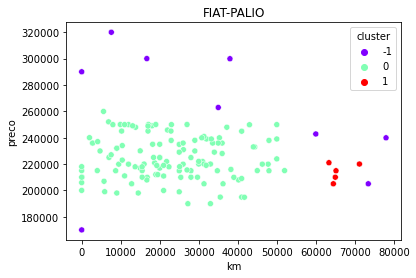

In [129]:
aux = topN_dict['TOYOTA|HILUX|2020|Automática|Picape|N|4|2.8|DIESEL']

aux2 = aux[aux["cluster"] == -1][["marca", "modelo", "ano", "km", "preco"]].sort_values(["km", "preco"])

# aux2 = pd.DataFrame(StandardScaler().fit_transform(aux2), columns = aux2.columns, index= aux2index)

print("\nOutliers:")

aux2["km"] = aux2["km"].apply(lambda x: locale.format_string("%d", x, grouping=True))
aux2["preco"] = aux2["preco"].apply(lambda x: locale.currency(x, grouping=True))

display(aux2)

f = sns.scatterplot(data=aux, y="preco", x="km", 
                    hue="cluster", palette="rainbow")

ax = plt.gca()
ax.set_title(marca + "-" + modelo)

plt.show()

__________

__________


____________

__API FIPE__

In [ ]:
import requests 

resposta = requests.get("https://fipeapi.appspot.com/api/1/carros/veiculos/21.json")

In [ ]:
resposta.json()